# Homework 6: Problems

### ASTROINFORMATICS
https://github.com/astromundus/astroinfo2018/blob/master/homework/HW6.ipynb


## Problem 1: Principal Component Analysis

PCA applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors, 

-- LINEAR variability period (logP) and variability amplitude (A).

Read the data (see below), run PCA (with four components), and then

a) to get familar with the dataset, plot g-i vs. u-g and A vs. logP diagrams

b) plot P2 vs. P1 diagram, and P3 vs. P1 diagram, and P3 vs. P4 diagram. 
Comment what insights, if any, did PCA analysis bring. 

c) plot P1 vs. g-i and P1 vs. logP diagrams; repeat with P2, P3, and P4.
Comment what insights, if any, did PCA analysis bring. 




### Some useful definitions and functions

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_LINEAR_geneva
from sklearn.decomposition import PCA
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=16, usetex=True)
from sklearn.preprocessing import StandardScaler
import pymc as pymc
%matplotlib inline

## Problem 1

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [3]:
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']

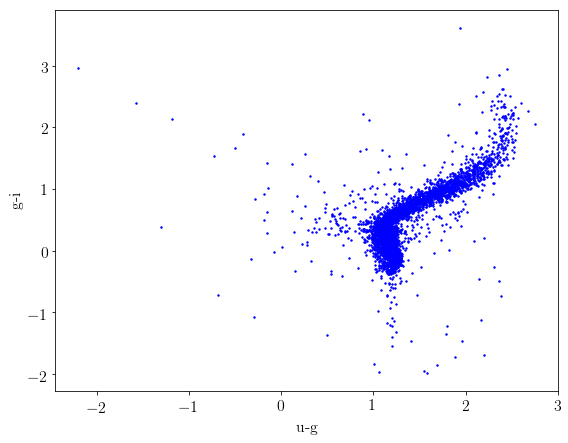

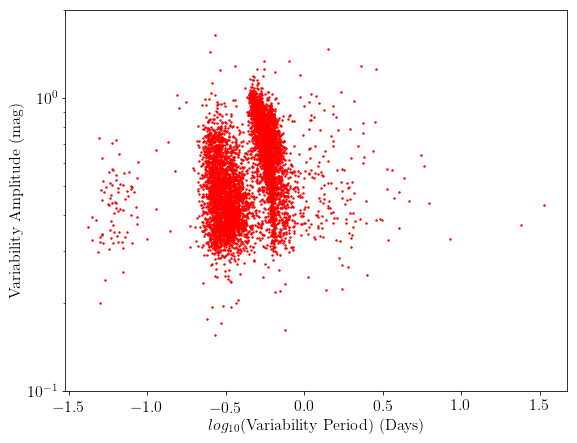

In [4]:
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(ug, gi, c='blue', s=2)

plt.xlabel('u-g')
plt.ylabel('g-i')

plt.show()

fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(logP, A, c='red', s=2)
plt.yscale('log')
plt.ylim(10**(-1), 2)

plt.ylabel('Variability Amplitude (mag)')
plt.xlabel('$log_{10}$(Variability Period) (Days)')

plt.show()

In [33]:
x=np.column_stack((ug,gi,logP, A))
x = StandardScaler().fit_transform(x)
pca=PCA(n_components=4)
pca.fit(x)

comp = pca.transform(x)
PCA_result=comp.T

mean=pca.mean_
components=pca.components_
var=pca.explained_variance_

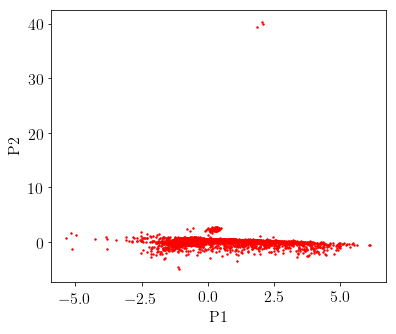

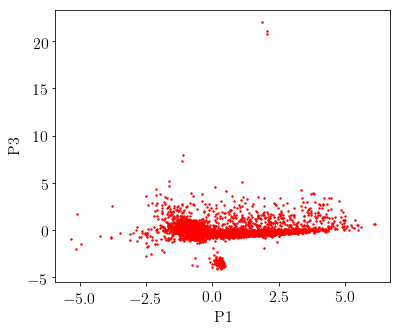

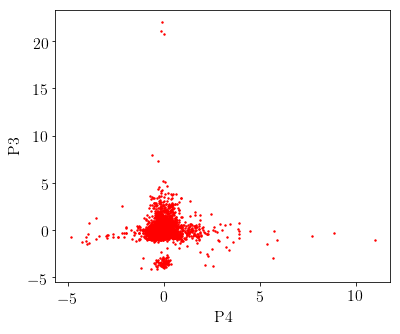

In [35]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[0], PCA_result[1], c='red', s=2)

#plt.yscale('log')
#plt.ylim(10**(-4), 5*10**(-2))
#plt.xscale('log')
#plt.xlim(10**(-7), 5*10**(-2))
#plt.xlim(-0.02, 0.02)
plt.ylabel('P2')
plt.xlabel('P1')

plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[0], PCA_result[2], c='red', s=2)

#plt.yscale('log')
#plt.ylim(10**(-6), 5*10**(-1))
#plt.xscale('log')
#plt.xlim(10**(-7), 5*10**(-2))
#plt.xlim(-0.02, 0.02)
plt.ylabel('P3')
plt.xlabel('P1')

plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[3], PCA_result[2], c='red', s=2)

#plt.yscale('log')
#plt.ylim(10**(-5), 5*10**(-1))
#plt.xscale('log')
#plt.xlim(-0.02, 0.02)

plt.ylabel('P3')
plt.xlabel('P4')

plt.show()

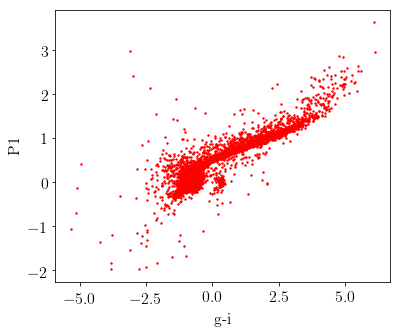

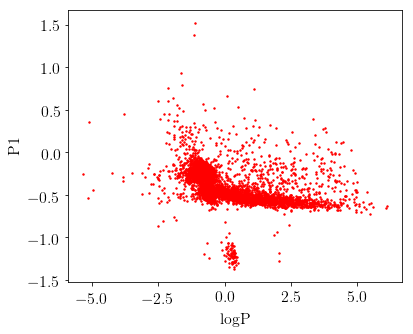

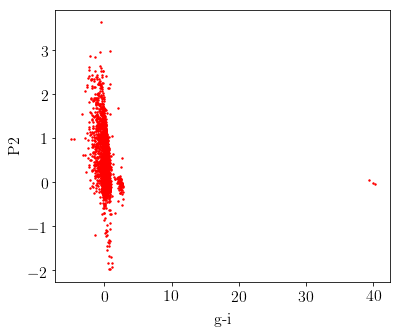

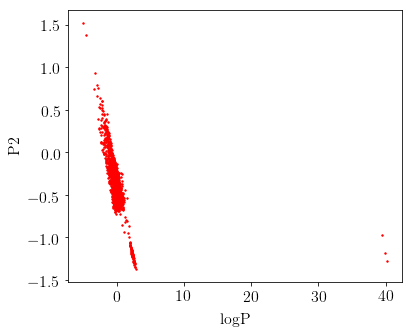

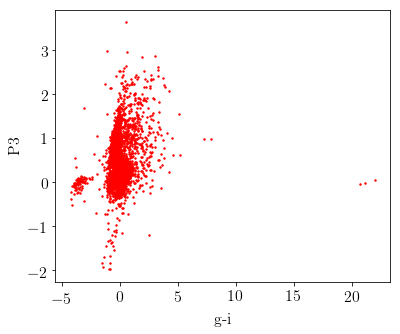

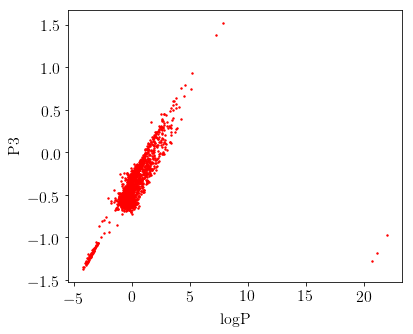

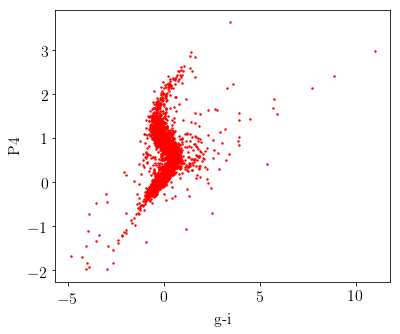

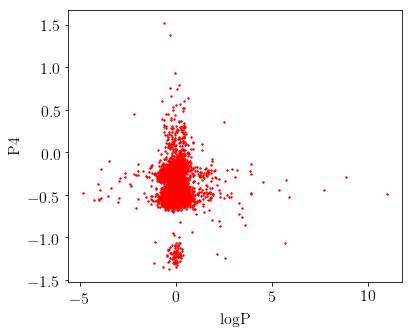

In [37]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[0], gi, c='red', s=2)
plt.ylabel('P1')
plt.xlabel('g-i')
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[0], logP, c='red', s=2)
plt.ylabel('P1')
plt.xlabel('logP')
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[1], gi, c='red', s=2)
plt.ylabel('P2')
plt.xlabel('g-i')
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[1], logP, c='red', s=2)
plt.ylabel('P2')
plt.xlabel('logP')
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[2], gi, c='red', s=2)
plt.ylabel('P3')
plt.xlabel('g-i')
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[2], logP, c='red', s=2)
plt.ylabel('P3')
plt.xlabel('logP')
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[3], gi, c='red', s=2)
plt.ylabel('P4')
plt.xlabel('g-i')
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(PCA_result[3], logP, c='red', s=2)
plt.ylabel('P4')
plt.xlabel('logP')
plt.show()



## Problem 2: Regression and age-color relation for asteroids

We will use age and color data for asteroid families shown in figure 1 from the paper "An age–colour relationship for main-belt S-complex asteroids" by Jedicke et al. (2004, Nature 429, 275), see http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf

Given these y(x) data (see below), with errors in both x and y, 
adapt the code introduced in 
[the last lecture](https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-8-Thu.ipynb) 
by modifying the parabola (y(x) = a + b*x + c*x^2) fitter to fit instead
the following function

$$ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right].  $$

Important: here x is time, not log(time)! But when you plot, use log(time)
for x axis (see data below).

a) What are the the best-fit values and standard errors for 
parameters a, b, c and d? 

b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

c) compare your best fit to the best fit from Jedicke et al. and comment

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): 
do you get a different best fit? 

<br>
These age and color data for asteroid families are taken
from the paper Jedicke et al. (2004, Nature 429, 275), see fig. 1 in 
http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf



In [8]:
# Age is measured in 10^6 yrs (Myr)
# Log10(age) and error (of Log(Age))
logAge = np.asarray([3.398, 2.477, 3.398, 3.477, 3.301, 1.699, 2.699, 0.763,
         2.301, 3.079,  3.176, 0.398])
LageErr = np.asarray([0.087, 0.145, 0.174, 0.145, 0.109, 0.347, 0.174, 0.015,
          0.217, 0.145, 0.145, 0.434])
# SDSS principal asteroid color PC1 and its error (per family)
PC1 = np.asarray([0.620, 0.476, 0.523, 0.582, 0.460, 0.479, 0.432, 0.351, 
       0.427, 0.522, 0.532, 0.311])
PC1err = np.asarray([0.005, 0.015, 0.007, 0.011, 0.005, 0.032, 0.033, 0.047,
        0.021, 0.015, 0.022, 0.027])
# time/age on linear axes
age = 10**logAge
# and standard error propagation (although errors can be large)
ageErr = age * LageErr * np.log(10)

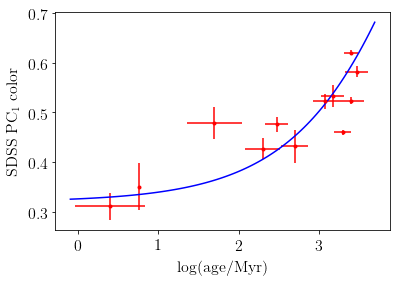

In [9]:
# let's take a quick look at the data to verify that it looks
# similar to fig. 1 from Jedicke et al. 
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='Observed')
plt.show() 

In [10]:
def doMCMCexponential(xObs, yObs, xErr, yErr, doXerror = False, nChain = 10000, nBurn = 2000): 
    def model(xObs, yObs, xErr, yErr, doXerror): 
        a = pymc.Uniform('a', -1000, 1000, value= 0.0)
        b = pymc.Uniform('b', -1000, 1000, value= 1.0)
        c = pymc.Uniform('c', 0.1, 10000, value= 1.0)
        d = pymc.Uniform('d', 0.1, 1000, value= 1.0)

        if (doXerror):
            xLatent = pymc.Normal('x', mu=xObs, tau=(xErr)**-2)  
        else:
            xLatent = xObs 
        
        @pymc.deterministic()
        def exponential(x=xLatent, a=a, b=b, c=c, d=d):
            return a + b*( 1 - (np.exp(-(x/c) ** d)))
    
        y = pymc.Normal('y', mu=exponential, tau=(yErr)**-2, value=yObs, observed=True)
        return locals()

    myModel = pymc.MCMC(model(xObs,yObs, xErr, yErr, doXerror))
    myModel.sample(nChain, nBurn, 1)
    traces = [myModel.trace(s)[:] for s in ['a', 'b', 'c', 'd']]
    M = pymc.MAP(myModel)
    M.fit()
    fit_vals = (M.a.value, M.b.value, M.c.value, M.d.value)
    return traces, fit_vals

In [11]:
traces, fit_vals = doMCMCexponential(age, PC1, ageErr, PC1err, True, 200000, 20000)

/home/devya_divi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


 [-----------------100%-----------------] 200000 of 200000 complete in 41.9 sec

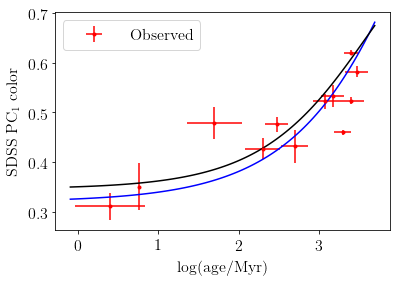

In [12]:
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
fitcolor= fit_vals[0] + fit_vals[1]*( 1 - np.exp(-(time/fit_vals[2]) ** fit_vals[3]))
ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue')
ax.plot(logT,fitcolor, c='black')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='Observed')
ax.legend()
plt.show() 

In [13]:
var=['a','b','c','d']
for i in range(0,len(fit_vals)):
    print('%s=%f'%(var[i],fit_vals[i]))

a=0.346199
b=0.471843
c=3704.341484
d=0.568529


In [14]:
print("BASIC STATS:")
print('a:', np.mean(traces[0]), np.median(traces[0]), np.std(traces[0]))
print('b:', np.mean(traces[1]), np.median(traces[1]), np.std(traces[1]))
print('c:', np.mean(traces[2]), np.median(traces[2]), np.std(traces[2]))
print('d:', np.mean(traces[3]), np.median(traces[3]), np.std(traces[3]))

BASIC STATS:
a: 0.330717672008 0.333958678727 0.041550505291
b: 0.576616329561 0.590183796671 0.111824066939
c: 6423.93929656 6683.84957952 2373.13686098
d: 0.533348283637 0.501546642245 0.174271067911


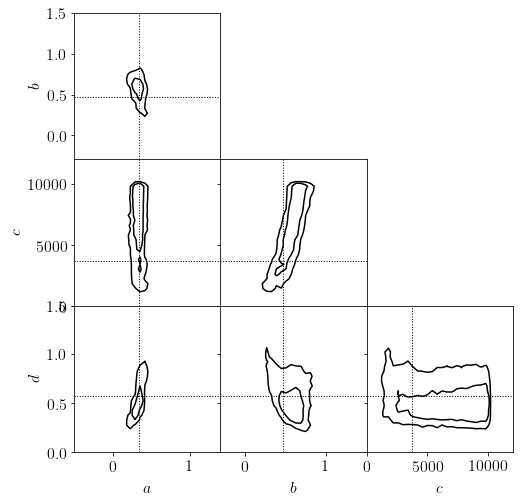

In [15]:
from astroML.plotting.mcmc import plot_mcmc

labels = ['$a$', '$b$', '$c$', '$d$']
limits = [(-0.5, 1.4), (-0.3, 1.5), (0, 12000), (0, 1.5)]
TLS = [fit_vals[0], fit_vals[1], fit_vals[2], fit_vals[3]]
 
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.1, right=0.95,
                    hspace=0.05, wspace=0.05)

# This function plots multiple panels with the traces
plot_mcmc(traces, labels=labels, limits=limits, true_values=TLS, fig=fig,
          bins=30, colors='k')

plt.show()

In [16]:
# Age is measured in 10^6 yrs (Myr)
# Log10(age) and error (of Log(Age))
logAge = np.asarray([3.398, 2.477, 3.398, 3.477, 3.301, 1.699, 2.699, 0.763,
         2.301, 3.079,  3.176, 0.398])
LageErr = np.asarray([0.001, 0.001, 0.001, 0.001, 0.001, 0.001,               #log10(0.001)= -3
                      0.001, 0.001, 0.001, 0.001, 0.001, 0.001])
# SDSS principal asteroid color PC1 and its error (per family)
PC1 = np.asarray([0.620, 0.476, 0.523, 0.582, 0.460, 0.479, 0.432, 0.351, 
       0.427, 0.522, 0.532, 0.311])
PC1err = np.asarray([0.005, 0.015, 0.007, 0.011, 0.005, 0.032, 0.033, 0.047,
        0.021, 0.015, 0.022, 0.027])
# time/age on linear axes
age = 10**logAge
# and standard error propagation (although errors can be large)
ageErr = age * LageErr * np.log(10)

In [17]:
def doMCMCexponential(xObs, yObs, xErr, yErr, doXerror = False, nChain = 10000, nBurn = 2000): 
    def model(xObs, yObs, xErr, yErr, doXerror): 
        a = pymc.Uniform('a', -1000, 1000, value= 0.0)
        b = pymc.Uniform('b', -1000, 1000, value= 1.0)
        c = pymc.Uniform('c', 0.1, 10000, value= 1.0)
        d = pymc.Uniform('d', 0.1, 10, value= 1)

        if (doXerror):
            xLatent = pymc.Normal('x', mu=xObs, tau=(xErr)**-2)  
        else:
            xLatent = xObs 
        
        @pymc.deterministic()
        def exponential(x=xLatent, a=a, b=b, c=c, d=d):
            return a + b*( 1 - (np.exp(-(x/c) ** d)))
    
        y = pymc.Normal('y', mu=exponential, tau=(yErr)**-2, value=yObs, observed=True)
        return locals()

    myModel = pymc.MCMC(model(xObs,yObs, xErr, yErr, doXerror))
    myModel.sample(nChain, nBurn, 1)
    traces = [myModel.trace(s)[:] for s in ['a', 'b', 'c', 'd']]
    M = pymc.MAP(myModel)
    M.fit()
    fit_vals = (M.a.value, M.b.value, M.c.value, M.d.value)
    return traces, fit_vals

In [18]:
traces, fit_vals = doMCMCexponential(age, PC1, ageErr, PC1err, True, 200000, 20000)

/home/devya_divi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/devya_divi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


 [-----------------100%-----------------] 200000 of 200000 complete in 40.4 sec

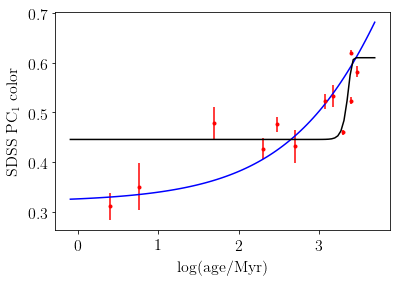

In [19]:
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
fitcolor= fit_vals[0] + fit_vals[1]*( 1 - np.exp(-(time/fit_vals[2]) ** fit_vals[3]))
ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue')
ax.plot(logT,fitcolor, c='black')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='Observed')
plt.show() 

In [20]:
var=['a','b','c','d']
for i in range(0,len(fit_vals)):
    print('%s=%f'%(var[i],fit_vals[i]))

a=0.445584
b=0.164115
c=2365.227332
d=10.000000


The fitting with Age error of 1000 years does not give a proper fit